In [1]:
# 필요 패키지 import
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
text =  open('./data/08. a_new_hope.txt').read()

# 텍스트 내 잇는 글자 수정
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')


# 그림 열기
mask = np.array(Image.open('./images/08. stormtrooper_mask.png'))

In [4]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")


In [8]:
wc  = WordCloud(max_words = 1000,
                mask = mask,
                stopwords = stopwords,
                margin = 10,
                random_state =1).generate(text)

default_colors = wc.to_array

In [9]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)
    

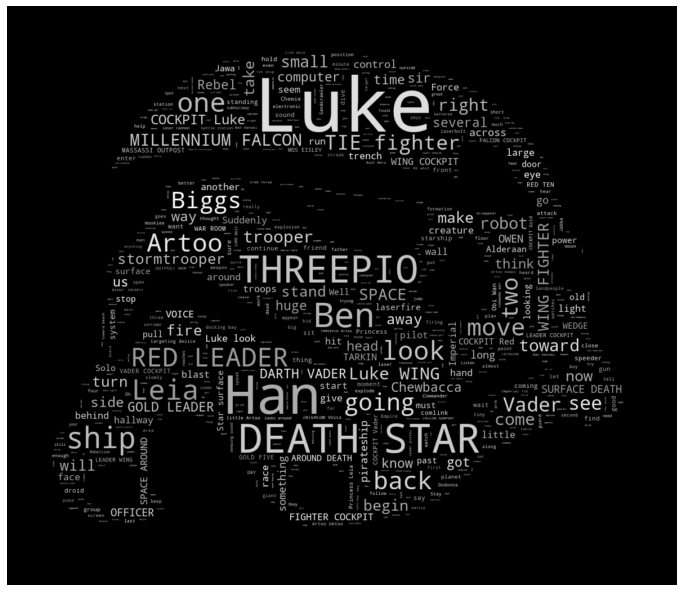

In [11]:
# 출력할 글자를 그림으로 출력
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()